In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [90]:
data1 = pd.read_csv(r'C:\Users\student\Desktop\미세미세\환경기상데이터\노원구\V10O1610102.csv', encoding='utf-8')
data1 = pd.DataFrame(data1)
data1.head()

,tm,serial,flag,pm10,co2,vocs,noise,temp,humi,pm25
0,2.020000e+11,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN
1,2.020000e+11,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN
2,2.020000e+11,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN
3,2.020000e+11,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN
4,2.020000e+11,V10O1610102,-999,-999,-999,-999,-999,-999.0,-999,NaN


In [91]:
#pm10의 증감을 확인
data1['pm10_inc']= data1['pm10']- data1['pm10'].shift(1)

In [92]:
len(data1[data1['pm10']< 0]) / len(data1)

0.04649122807017544

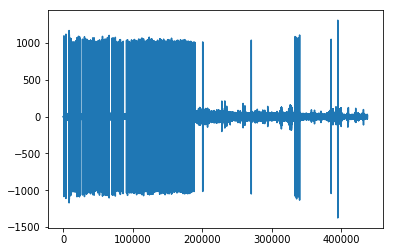

In [93]:
#주가에서는 절대값은 별로 중요하지 않다. 증감이중요!-->증감 확인
plt.plot(data1['pm10_inc']) #증감에서는 의미없는 값이기 때문에 버리는게 나아보임

In [94]:
vInc=pd.DataFrame(data1['pm10_inc'])
vInc.dropna()
vInc.head()

,pm10_inc
0,NaN
1,0.0
2,0.0
3,0.0
4,0.0


In [95]:
data2=vInc[vInc['pm10_inc']<500]
data3=data2[data2['pm10_inc']>-500]

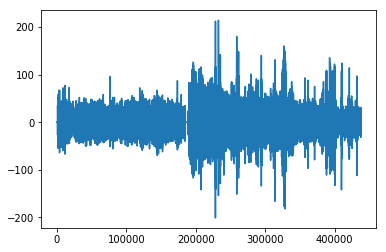

In [96]:
plt.plot(data3['pm10_inc']) # 1분단위의 증가

 5월                                          3월  
                      ㄴRegime switching(국면 전환 지점)  
                        change point  
                        why?--->계절 변환? 다른 기기를 확인해보자

In [78]:
#2번쨰 엑셀 파일

dv2 = pd.read_csv(r'C:\Users\student\Desktop\미세미세\환경기상데이터\노원구\V10O1610200.csv', encoding='utf-8')
dv2 = pd.DataFrame(dv2)
dv2.head()

,tm,serial,flag,pm10,co2,vocs,noise,temp,humi,pm25,Unnamed: 10
0,201804010000,V10O1610200,1,80,-9999,-9999,48,15.3,50,48.0,NaN
1,201804010001,V10O1610200,1,74,-9999,-9999,47,15.3,50,45.0,NaN
2,201804010002,V10O1610200,1,69,-9999,-9999,46,15.3,50,42.0,NaN
3,201804010003,V10O1610200,1,72,-9999,-9999,47,15.1,51,43.0,NaN
4,201804010004,V10O1610200,1,61,-9999,-9999,47,15.1,51,37.0,NaN


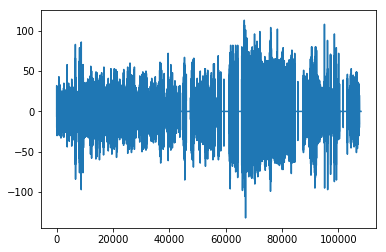

In [79]:
#pm10의 증감을 확인
dv2['pm10_inc']= dv2['pm10']- dv2['pm10'].shift(1)
len(dv2[dv2['pm10']< 0]) / len(dv2)

vInc2=pd.DataFrame(dv2['pm10_inc'])
vInc2.dropna()

dv21=vInc2[vInc2['pm10_inc'] < 500]
dv22=dv21[dv21['pm10_inc'] > -500]

plt.plot(dv22['pm10_inc']) # 1분단위의 증가

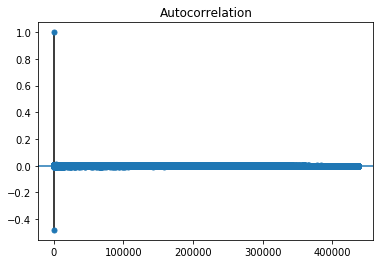

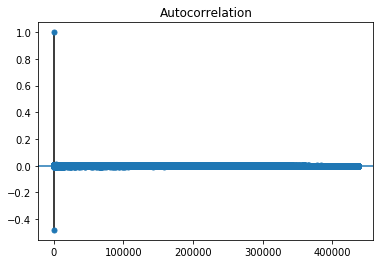

In [80]:
#바로 직전 1개 이전과의 상관성 확인(acf)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data3['pm10_inc'])
#올라오지 않음 = 과거와 무관함을 확인 or 0 data가 너무 많아서 그럴 수도 있음

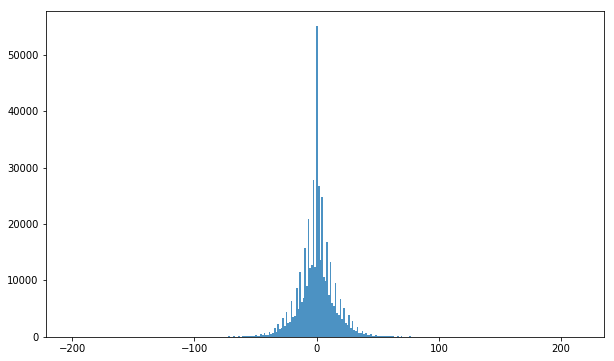

In [81]:
#분포를 확인해보자.
plt.figure(figsize=(10,6))
n, bins, patched=plt.hist(data3['pm10_inc'],bins=300, alpha=0.8)
#plt.axvline(data3['pm10_inc'].mean(), color='red')
plt.show()


ㄴ-900 -> 0 값으로 변한 애들이 제일 많고 미세먼지 심한 애들은 그닥 없음

In [82]:
#표준편차 계산
data3['pm10_inc'].std()
#1σ가 95%정도, 2σ(30)지점 정도 

#1분동안의 극심한 변화를 보이는 것이 전체적으로 몇 %정도 되는가?
# + - 15.6 이상-> 약 22%
# + - 30 이상-> 약 3%

15.22079212044357

In [83]:
s= data3['pm10_inc'].std()
len(data3[data3['pm10_inc']>2 * s]) / len(data3)


0.025862700061310955

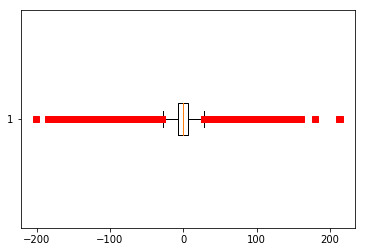

In [84]:
plt.boxplot(data3['pm10_inc'], 0, 'rs', 0)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


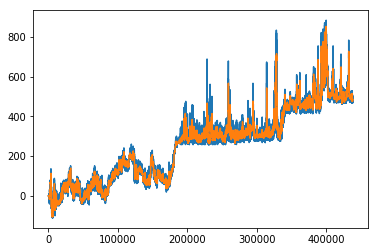

In [98]:
#원래 데이터의 증감을 받고 누적 (수평선은 -999를 0으로 변환하여 누적된상태)

data3['sum']= data3['pm10_inc'].cumsum()
data3['ma']=data3['sum'].rolling(window=60).mean()

plt.plot(data3['sum'])
plt.plot(data3['ma'])
plt.show()

In [86]:
#plot 에서 뭔가 데이터의 구조가 바뀐 지점을 찾는 방법_>bayesian changing point1(BCP)

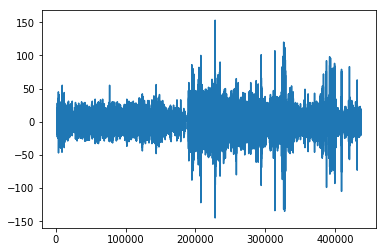

In [104]:
#pm25의 증감을 확인

#1시간 단위
dv2['sum']= dv2['pm25_inc'].cumsum()
dv2['ma']=dv2['sum'].rolling(window=60).mean()

dbinc=pd.DataFrame(dv2['pm25_inc'])
dbinc.dropna()

micro1=dbinc[dbinc['pm25_inc'] < 500]
micro2=micro1[micro1['pm25_inc'] > -500]

plt.plot(dv22['pm25_inc']) # 1분단위의 증가

In [ ]:
plot_acf(data3['pm10_inc'])